>Load the dataset

In [5]:
import pandas as pd

# Load data
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

# Merge datasets
data = pd.merge(ratings, movies, on='movieId')
print(data.head())


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


>Data Exploration and Cleaning

In [6]:
import pandas as pd

# Load data
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

# Merge datasets
data = pd.merge(ratings, movies, on='movieId')
print(data.head())


   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


>Build a Recommendation Model

In [9]:
#Collaborative Filtering Approach
#Use the Surprise library to implement collaborative filtering based on user-item interactions.

#Train-Test Split

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0.5, 5))
dataset = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(dataset, test_size=0.25)


In [13]:
#Train a Model

from surprise import SVD
from surprise import accuracy

model = SVD()  # Singular Value Decomposition algorithm
model.fit(trainset)

# Evaluate on test set
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))


RMSE: 0.8731
RMSE: 0.8731203317355114


In [14]:
#Generate a Recomemndation

def recommend(user_id, model, data, n=5):
    user_movies = data[data['userId'] == user_id]['movieId'].unique()
    all_movies = data['movieId'].unique()
    recommendations = [movie for movie in all_movies if movie not in user_movies]

    scores = [(movie, model.predict(user_id, movie).est) for movie in recommendations]
    top_recommendations = sorted(scores, key=lambda x: x[1], reverse=True)[:n]
    return top_recommendations

print(recommend(1, model, data))



[(318, 5), (904, 5), (908, 5), (912, 5), (930, 5)]


>Insights and Visualization  

Insights:  
Show top-rated genres or movies.  
Analyze user preferences by demographics (if available).  
Compare RMSE with baseline models to validate performance.  

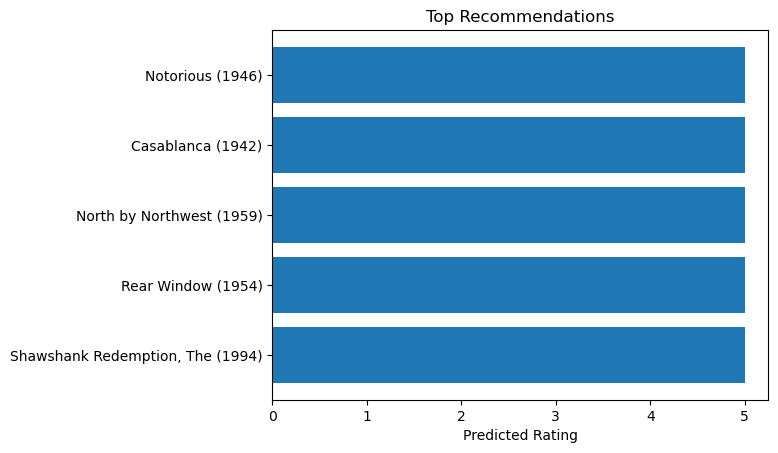

In [21]:
import os
import matplotlib.pyplot as plt

#Visualize Recommendations

# Construct the path to the output directory relative to the data directory
output_dir = 'output'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Example visualization of top recommendations
top_movies = recommend(1, model, data)
movie_titles = [movies[movies['movieId'] == m[0]]['title'].values[0] for m in top_movies]
scores = [m[1] for m in top_movies]

plt.barh(movie_titles, scores)
plt.xlabel('Predicted Rating')
plt.title('Top Recommendations')


# Save the plot to the output directory
output_path = os.path.join(output_dir, 'Top_Movie_Recommendations.png')
plt.savefig(output_path)

# Show the plot
plt.show()
